In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('uber.csv')
df.head(4)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    # radius of earth
    R = 6371  

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c

    return distance

In [9]:
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [10]:
df.head(4)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683


In [11]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


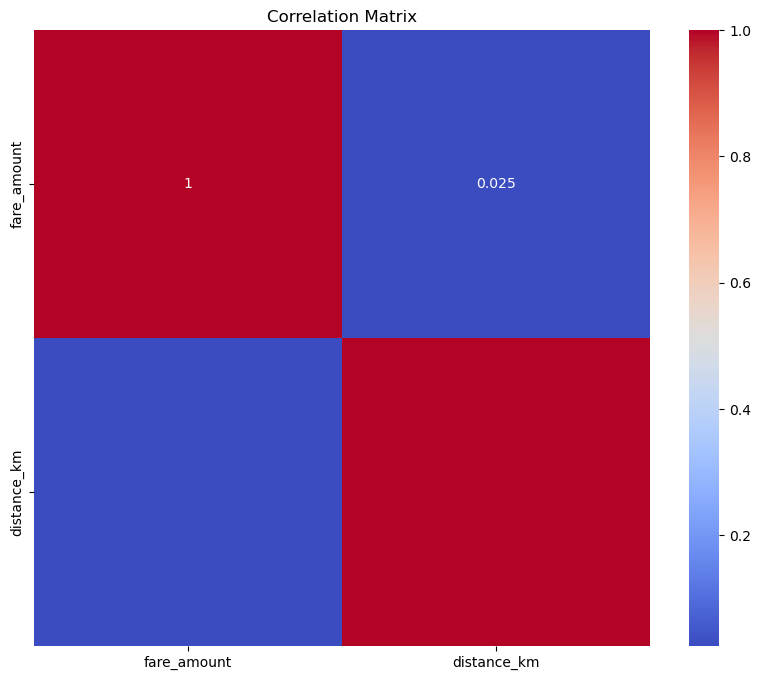

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df[['fare_amount','distance_km']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


<Axes: >

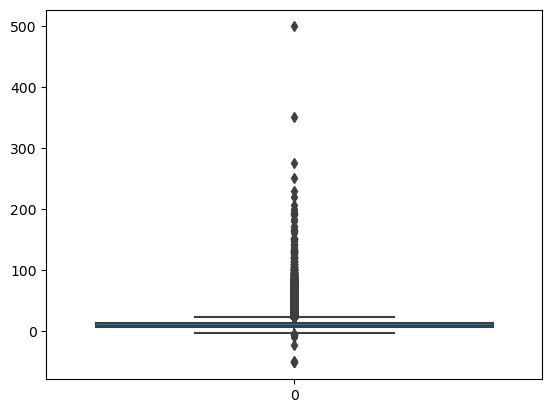

In [30]:
sns.boxplot(df['fare_amount'])

<Axes: >

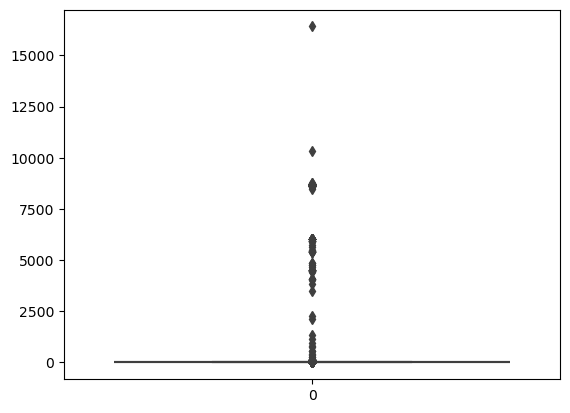

In [32]:
sns.boxplot(df['distance_km'])

In [33]:
# x = df.drop(['key','fare_amount','pickup_datetime'], axis=1)
x = df[['distance_km']]
y = df['fare_amount']
x.shape

(199999, 1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
Lr = LinearRegression()
Ri = Ridge(alpha=1.0)
La = Lasso(alpha=0.1, max_iter=10000)

In [17]:
Lr.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = Lr.predict(x_test)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mae : {mean_absolute_error(y_test,y_pred)}")
print(f"mse : {mean_squared_error(y_test,y_pred)}")

r2_score : 0.0003229563382536327
mae : 6.070413444458339
mse : 103.99033891768465


In [21]:
Ri.fit(x_train,y_train)
y_pred = Ri.predict(x_test)

In [22]:
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mae : {mean_absolute_error(y_test,y_pred)}")
print(f"mse : {mean_squared_error(y_test,y_pred)}")

r2_score : 0.0003229563382667333
mae : 6.070413444458251
mse : 103.9903389176833


In [27]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=80, random_state=42)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [28]:
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mae : {mean_absolute_error(y_test,y_pred)}")
print(f"mse : {mean_squared_error(y_test,y_pred)}")

r2_score : 0.5722695307267798
mae : 3.07152255246678
mse : 44.49420615103452


In [25]:
La.fit(x_train, y_train)
y_pred = La.predict(x_test)


In [26]:
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mae : {mean_absolute_error(y_test,y_pred)}")
print(f"mse : {mean_squared_error(y_test,y_pred)}")

r2_score : 0.00032326993276932114
mae : 6.070411364489117
mse : 103.99030629634942


<Axes: xlabel='distance_km'>

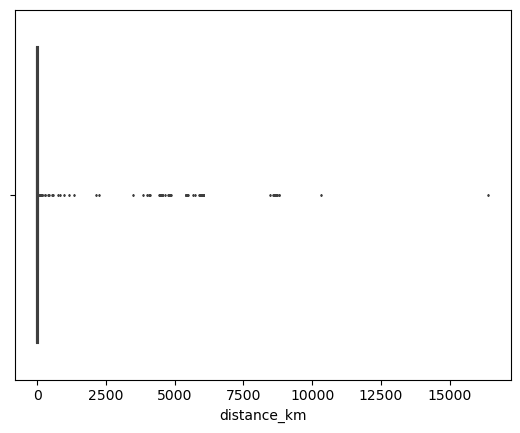

In [29]:
sns.boxplot(data=df, x='distance_km', fliersize=1)